# Velocity Based Motion Model
## Initial Setting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
from matplotlib import patches
%matplotlib inline

In [115]:
R = 6
params_list = [(0.05,)*6, (0.02, 0.02, 0.1, 0.1, 0.02, 0.02), (0.2, 0.2, 0.02, 0.02, 0.02, 0.02)]
v = 3
omega = v/R
points_data = np.tile(np.array([0,-6]),(500,1))

## Main Function

In [116]:
def get_iteration_result(points_data, v, omega, params):
    theta = 0
    theta_prime_ideal = 60/180*np.pi
    delta_t = 60/180*np.pi/omega
    stdv1 = params[0]*np.abs(v) + params[1]*np.abs(omega)
    stdv2 = params[2]*np.abs(v) + params[3]*np.abs(omega)
    stdv3 = params[4]*np.abs(v) + params[5]*np.abs(omega)
    v_tilta = v*np.ones(500) + np.random.normal(scale=stdv1,size=500)
    omega_tilta = omega*np.ones(500) + np.random.normal(scale=stdv2,size=500)
    gama_tilta = np.random.normal(scale=stdv3,size=500)
    x_prime = points_data[:,0] + v_tilta/omega_tilta*np.sin(omega_tilta*delta_t)
    y_prime = points_data[:,1] + v_tilta/omega_tilta*(np.ones(500) - np.cos(omega_tilta*delta_t))
    theta_prime = (omega_tilta + gama_tilta)*delta_t
    return np.stack((x_prime,y_prime,theta_prime), axis = 1)


In [130]:
result_list = []
for params in params_list:
    print(1)
    result_list.append(get_iteration_result(points_data, v, omega, params))

## Draw the Results

In [131]:
def show_result(result):
    center0 = (0, 0)
    center1 = (0,-6)
    center2 = (3*np.sqrt(3), -3)
    lines = [[center0,center1],[center0,center2],[center1,(1,-6)], [center2,(3*np.sqrt(3)+0.5,0.5*np.sqrt(3)-3)]]
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xlim([-2,7])
    ax.set_ylim([-8,1])
    c1 = patches.Circle(center1,1,fill=False)
    c2 = patches.Circle(center2,1,fill=False)
    e1 = patches.Arc(center0,10,10,theta1=270,theta2=330)
    e2 = patches.Arc(center0,14,14,theta1=270,theta2=330)
    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(e1)
    ax.add_patch(e2)
    lc = mc.LineCollection(lines, linewidths=2)
    ax.add_collection(lc)
    plt.scatter(result[:,0], result[:,1], c='red', s=1)
    plt.show()

1


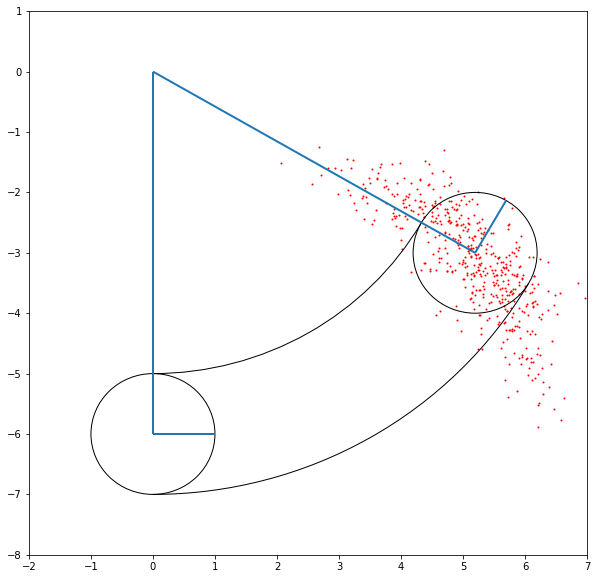

1


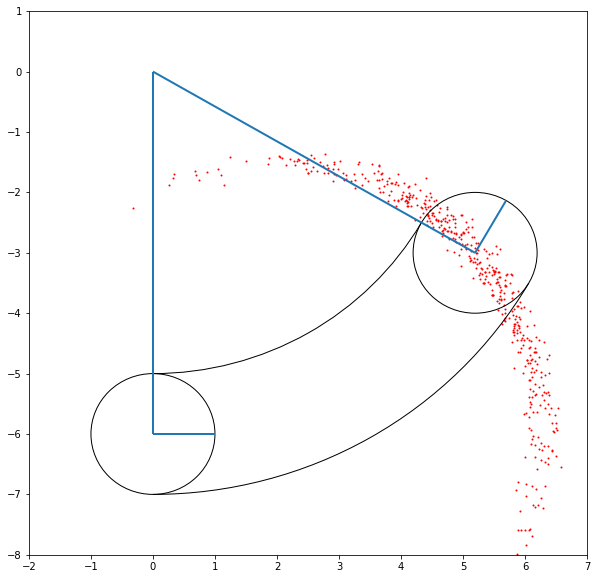

In [133]:
for result in result_list:
    show_result(result)